# Sequential Indicator Simulation

>**Note** this notebook is ispired by the notebook [ex_geosclassic_indicator_2d.ipynb](https://github.com/randlab/geone/blob/master/examples/ex_geosclassic_indicator_2d.ipynb) by Julien Straubhaar

Instead of simulating continuous values like we did in the previous notebooks, one can think about simulating directly some *indicator variables*.

For example, suppose that you are only interested in defining the spatial ditribution of some pollutant above a given threshold, or that the data available from the field surveys are categorical. This could be the case of some lithological logs, where the available information is "sand", "gravel", "clay", and so on. You can associate some indicator values to these values, for example `1` for sand, `2` for gravel, `3` for clay.

In this notebook we will demonstrate the usage of Sequential Indicator Simulation (SIS).

Hereinafter we will only focus on the new details related to SIS, and we will skip all the details already explained in the previous notebooks about simulation.

Fist of all, we ned to install the required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# import package 'geone'
import geone as gn

Second, the number of categories to be simulated should be defined.

>**Option**: If you define only one category (it should be a value $>0$), then the procedure is automatically set up for a binary case, where only two codes True/False are defined.

In [2]:
category_values = [1., 2., 3.]
ncategory = len(category_values)

Then (only for plotting purposes) one can assign a value to each category and put it into a list (`categCol`). The second line defines a list (`cmap_categ`) containing one color map for each category, going from white to the category color. It will be later used to plot the proportions of each category. 

In [3]:
categCol = ['lightblue', 'orange', 'darkgreen']
# categCol = ['#1b9e77', '#d95f02', '#7570b3'] # see https://colorbrewer2.org for other suggestions
cmap_categ = [gn.customcolors.custom_cmap(['white', c]) for c in categCol]

## Variogram model

Like for almost all the other geostatistical simulation methods, a variogram is required to define the expected spatial structure of our data (in general, one variogram for each category should be used; quite often using the same variogram for all the categories works fine too).

In [4]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('exponential', {'w':9., 'r':[150, 40]}), # elementary contribution
    ], alpha=-30, name='model-2D example')

We also need to define a grid where to simulate, that is the map that will contain the simulation results.

## Simulation grid and conditioning data

In [5]:
nx, ny = 220, 230  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin

dimension = (nx, ny)
spacing = (dx, dy)
origin = (ox, oy)

In [6]:
x = np.array([[ 10.,  20.], # 1st point
              [ 50.,  40.], # 2nd point
              [ 20., 150.], # 3rd point
              [200., 210.]]) # 4th point
v = [ 1., 2., 1., 3.] # values

## Simulation

Here we apply the SIS method. All the parameters are very similar to those used for the Sequential Gaussian Simulation (SGS) examples.

In [ ]:
nreal = 10
np.random.seed(321)
geosclassic_output = gn.geosclassicinterface.simulateIndicator2D(
    category_values, cov_model, dimension, spacing, origin, 
    x=x, v=v, method='ordinary_kriging', 
    searchRadiusRelative=1.0, nneighborMax=12, nreal=nreal, nthreads=1)

The code required to collect the output of the simulation is simular too...

The main difference here is that instead of computing a mean value average map and a standard deviation maps (pixel-wise) for all the available realizations, it is more interesting to plot some maps with the proportions (for all the realizations, pixel-wise) of each category.

## Collect results and plot

In [ ]:
# Retrieve the realizations
simul = geosclassic_output['image']

# Compute proportion of each category (pixel-wise)
simul_prop = gn.img.imageCategProp(simul, category_values)

Hereinafter the plots

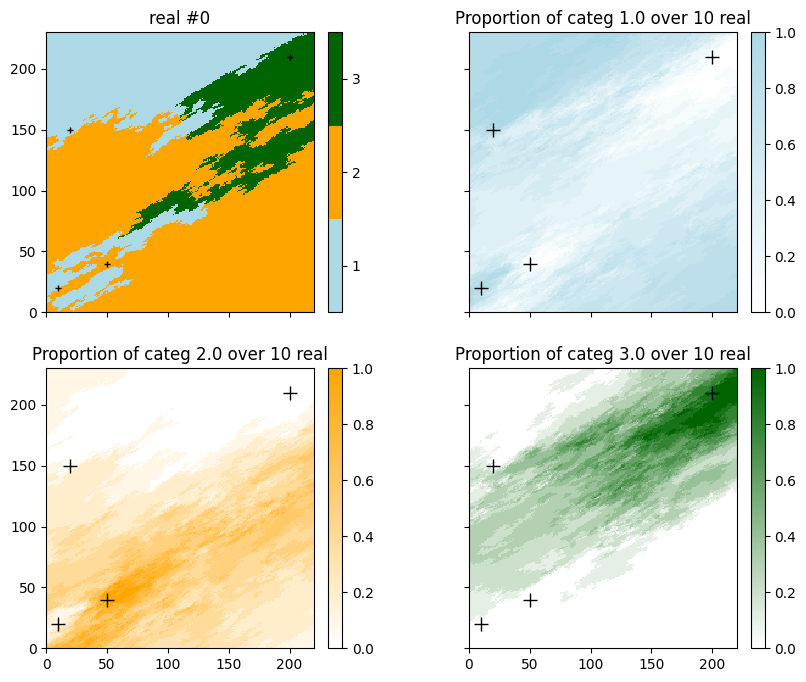

In [19]:
# Plot
plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)

plt.subplot(2,2,1)
gn.imgplot.drawImage2D(simul, iv=0, categ=True, categCol=categCol, title='real #0')
plt.plot(x[:,0],x[:,1], '+', c='black', markersize=5) # add conditioning point locations

for i in range(ncategory):
    plt.subplot(2,2,2+i)
    gn.imgplot.drawImage2D(simul_prop, iv=i, vmin=0, vmax=1, cmap=cmap_categ[i], 
                           title='Proportion of categ {0} over {1} real'.format(category_values[i], nreal))
    plt.plot(x[:,0],x[:,1], '+', c='black', markersize=10) # add conditioning point locations